In [2]:
from IPython.display import HTML
HTML("""
<div style="padding: 10px; background: #f0f0f0; border-radius: 5px; text-align: center;">
    <h3>Dashboard Interativo</h3>
    <a href="https://telecomx-dashboard.onrender.com/" target="_blank">
        <button style="padding: 10px 20px; background: #4CAF50; color: white; border: none; border-radius: 5px; cursor: pointer;">
            Clique para Abrir
        </button>
    </a>
    <p><i>*Certifique-se de que o servidor Dash está em execução.</i></p>
</div>
""")

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio


url  = 'https://raw.githubusercontent.com/RafaelRReis/TelecomX_BR_2/main/Dados_tratados_desafio_Telecom_X.csv'

dados = pd.read_csv(url)

dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias,escala_customer_tenure,escala_account_Charges_Monthly,escala_account_Charges_Total,escala_Contas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,one year,yes,mailed check,65.6,593.30,2.16,0-20,61-80,501-1000,2.0-2.5
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,month-to-month,no,mailed check,59.9,542.40,1.97,0-20,41-60,501-1000,1.5-2.0
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,month-to-month,yes,electronic check,73.9,280.85,2.43,0-20,61-80,0-500,2.0-2.5
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,month-to-month,yes,electronic check,98.0,1237.85,3.22,0-20,81-100,1001-1500,3.0-3.5
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,month-to-month,yes,mailed check,83.9,267.40,2.76,0-20,81-100,0-500,2.5-3.0


In [187]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customerID                      7032 non-null   object 
 1   Churn                           7032 non-null   object 
 2   customer_gender                 7032 non-null   object 
 3   customer_SeniorCitizen          7032 non-null   int64  
 4   customer_Partner                7032 non-null   object 
 5   customer_Dependents             7032 non-null   object 
 6   customer_tenure                 7032 non-null   int64  
 7   phone_PhoneService              7032 non-null   object 
 8   phone_MultipleLines             7032 non-null   object 
 9   internet_InternetService        7032 non-null   object 
 10  internet_OnlineSecurity         7032 non-null   object 
 11  internet_OnlineBackup           7032 non-null   object 
 12  internet_DeviceProtection       70

In [188]:
dados.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.128719
std,0.368844,24.545260,30.085974,2266.771362,0.988302
min,0.000000,1.000000,18.250000,18.800000,0.600000
25%,0.000000,9.000000,35.587500,401.450000,1.170000
50%,0.000000,29.000000,70.350000,1397.475000,2.310000
75%,0.000000,55.000000,89.862500,3794.737500,2.950000
max,1.000000,72.000000,118.750000,8684.800000,3.900000


In [189]:
colunas_a_remover = ['customerID','escala_customer_tenure','escala_account_Charges_Monthly','escala_account_Charges_Total','escala_Contas_Diarias']
dados = dados.drop(colunas_a_remover, axis=1)
dados.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.16
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.97
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.43
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.22
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.76


In [190]:
dados['phone_MultipleLines'].unique()

array(['no', 'yes', 'no phone service'], dtype=object)

In [191]:
substituir_phone = {'no phone service': 'no'}
dados['phone_MultipleLines'] = dados['phone_MultipleLines'].replace(substituir_phone)

substituir_internet = {'no internet service': 'no'}
dados['internet_OnlineSecurity'] = dados['internet_OnlineSecurity'].replace(substituir_internet)
dados['internet_OnlineBackup'] = dados['internet_OnlineBackup'].replace(substituir_internet)
dados['internet_DeviceProtection'] = dados['internet_DeviceProtection'].replace(substituir_internet)
dados['internet_TechSupport'] = dados['internet_TechSupport'].replace(substituir_internet)
dados['internet_StreamingTV'] = dados['internet_StreamingTV'].replace(substituir_internet)
dados['internet_StreamingMovies'] = dados['internet_StreamingMovies'].replace(substituir_internet)

dados.head(20)

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.16
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.97
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.43
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.22
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.76
5,no,female,0,no,yes,9,yes,no,dsl,no,...,no,yes,yes,yes,month-to-month,yes,credit card (automatic),69.40,571.45,2.28
6,no,female,1,yes,no,71,yes,no,fiber optic,yes,...,yes,yes,yes,yes,two year,yes,bank transfer (automatic),109.70,7904.25,3.60
7,no,male,0,yes,no,63,yes,yes,fiber optic,yes,...,no,yes,no,no,two year,yes,credit card (automatic),84.65,5377.80,2.78
8,no,female,1,no,no,7,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic check,48.20,340.35,1.58
9,no,female,0,yes,yes,65,yes,yes,dsl,yes,...,yes,yes,yes,yes,two year,yes,mailed check,90.45,5957.90,2.97


In [192]:
dados['Churn'].value_counts(normalize=True)

,proportion
Churn,
no,0.734215
yes,0.265785


In [193]:
# PALETA CORPORATIVA
CORES = {
    'yes': '#B22234',  # Vermelho institucional
    'no': '#005F73'    # Azul profundo
}
DETALHES = '#E9C46A'   # Dourado
FUNDO = '#FFFFFF'      # Branco

# Configuração base
pio.templates.default = 'seaborn'

# Preparando os dados
contagem = dados['Churn'].value_counts().reset_index()
contagem.columns = ['Churn', 'Total']
contagem['Porcentagem'] = (contagem['Total'] / contagem['Total'].sum()) * 100
contagem['Legenda'] = contagem.apply(lambda x: f"{x['Churn']}: {x['Total']} clientes", axis=1)

# Criando o gráfico
fig = px.pie(
    contagem,
    values='Porcentagem',
    names='Legenda',  # Usando a legenda personalizada
    color='Churn',
    color_discrete_map=CORES,
    hole=0.3,  # Donut chart
    width=800,
    height=600
)

# Layout corporativo
fig.update_layout(
    title_text="<b style='font-size:24px;color:#264653'>DISTRIBUIÇÃO DE CHURN</b>",
    title_x=0.5,
    plot_bgcolor=FUNDO,
    paper_bgcolor=FUNDO,
    legend_title_text='<b style="font-size:12px">STATUS (QUANTIDADE)</b>',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.15,
        xanchor="center",
        x=0.5
    ),
    font=dict(
        family="Calibri",
        size=14,
        color="#264653"
    ),
    margin=dict(t=100, b=100),
    hoverlabel=dict(
        bgcolor="rgba(255,255,255,0.9)",
        font_size=14,
        bordercolor="#E9C46A"
    )
)

# Formatação dos textos
fig.update_traces(
    textposition='inside',
    texttemplate='%{percent:.1%}',
    textfont_size=16,
    marker=dict(line=dict(color='#FFFFFF', width=2)),
    hovertemplate="<b>%{label}</b><br>Porcentagem: %{percent:.1%}<extra></extra>"
)

# Adicionando a quantidade total no centro
fig.add_annotation(
    text=f"TOTAL:<br>{contagem['Total'].sum()} clientes",
    x=0.5, y=0.5,
    font_size=20,
    showarrow=False,
    font_color="#264653"
)

fig.show()

In [194]:
# PALETA CORPORATIVA (mesma anterior)
CORES = {
    'yes': '#B22234',  # Vermelho institucional
    'no': '#005F73'    # Azul profundo
}
DETALHES = '#E9C46A'   # Dourado
FUNDO = '#FFFFFF'      # Branco

# Configuração base limpa
pio.templates.default = 'seaborn'

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=(
        "<span style='font-size:14px;color:#264653'>COMPOSIÇÃO POR GÊNERO</span>",
        "<span style='font-size:14px;color:#264653'>É IDOSO?</span>",
        "<span style='font-size:14px;color:#264653'>STATUS DE PARCEIRO</span>",
        "<span style='font-size:14px;color:#264653'>TEM DEPENDENTES?</span>"
    ),
    horizontal_spacing=0.15,
    vertical_spacing=0.25
)

# Função ajustada para valores absolutos
def add_executive_chart(fig, dados, coluna, row, col):
    graf = px.histogram(
        dados,
        x=coluna,
        color='Churn',
        color_discrete_map=CORES,
        barmode='group',
        text_auto=True,  # Mostra valores absolutos
        opacity=0.85
    )

    # Padronização corporativa
    for trace in graf.data:
        fig.add_trace(
            trace.update(
                marker_line_color='#FFFFFF',
                marker_line_width=1,
                name='CHURN' if trace.name == 'yes' else 'RETIDO',
                showlegend=(row==1 and col==1),
                textfont_size=10
            ),
            row=row,
            col=col
        )

    # Anotações executivas
    fig.update_xaxes(
        title_text=coluna.replace('_', ' ').upper(),
        title_font=dict(size=12, color='#264653'),
        tickfont=dict(size=11),
        row=row,
        col=col
    )

# Adicionando gráficos
metrics = ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents']
for i, col in enumerate(metrics):
    add_executive_chart(fig, dados, col, (i//2)+1, (i%2)+1)

# Layout executivo (mesmo anterior)
fig.update_layout(
    height=900,
    width=1200,
    title_text="<b style='font-size:20px;color:#264653'>ANÁLISE STRATÉGICA DE CHURN</b>",
    title_x=0.5,
    plot_bgcolor=FUNDO,
    paper_bgcolor=FUNDO,
    legend_title_text='<b style="font-size:12px">STATUS</b>',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    font=dict(
        family="Calibri",
        size=12,
        color="#264653"
    ),
    hoverlabel=dict(
        bgcolor="rgba(255,255,255,0.9)",
        font_size=12,
        bordercolor="#E9C46A"
    )
)

# Ajuste final para valores absolutos
fig.update_traces(
    texttemplate='%{y}',  # Formato numérico simples
    textposition='outside',
    textfont_size=10
)

fig.show()

In [195]:
# PALETA CORPORATIVA
CORES = {
    'yes': '#B22234',  # Vermelho institucional
    'no': '#005F73'    # Azul profundo
}
DETALHES = '#E9C46A'   # Dourado
FUNDO = '#FFFFFF'      # Branco

# Configuração base limpa
pio.templates.default = 'seaborn'

# Criando figura com 4 linhas e 2 colunas
fig = make_subplots(
    rows=4,
    cols=2,
    subplot_titles=(
        "<span style='font-size:14px;color:#264653'>TIPO DE SERVIÇO DE INTERNET</span>",
        "<span style='font-size:14px;color:#264653'>SEGURANÇA ONLINE</span>",
        "<span style='font-size:14px;color:#264653'>BACKUP ONLINE</span>",
        "<span style='font-size:14px;color:#264653'>PROTEÇÃO DE DISPOSITIVO</span>",
        "<span style='font-size:14px;color:#264653'>SUPORTE TÉCNICO</span>",
        "<span style='font-size:14px;color:#264653'>STREAMING TV</span>",
        "<span style='font-size:14px;color:#264653'>STREAMING FILMES</span>",
        ""  # Título vazio para o último subplot não utilizado
    ),
    horizontal_spacing=0.15,
    vertical_spacing=0.1
)

# Função para adicionar gráficos
def add_executive_chart(fig, dados, coluna, row, col):
    graf = px.histogram(
        dados,
        x=coluna,
        color='Churn',
        color_discrete_map=CORES,
        barmode='group',
        text_auto=True,
        opacity=0.85,
        category_orders={coluna: sorted(dados[coluna].unique())}
    )

    for trace in graf.data:
        fig.add_trace(
            trace.update(
                marker_line_color='#FFFFFF',
                marker_line_width=1,
                name='CHURN' if trace.name == 'yes' else 'RETIDO',
                showlegend=(row==1 and col==1),
                textfont_size=8
            ),
            row=row,
            col=col
        )

    fig.update_xaxes(
        title_text=coluna.replace('internet_', '').replace('_', ' ').title(),
        title_font=dict(size=10, color='#264653'),
        tickfont=dict(size=9),
        row=row,
        col=col
    )

# Lista de features
metrics = [
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# Adicionando gráficos
for i, col in enumerate(metrics):
    row = (i // 2) + 1
    col_num = (i % 2) + 1
    add_executive_chart(fig, dados, col, row, col_num)

# Layout ajustado
fig.update_layout(
    height=1400,  # Aumentado para melhor visualização
    width=1200,
    title_text="<b style='font-size:20px;color:#264653'>ANÁLISE DE CHURN POR SERVIÇOS DE INTERNET</b>",
    title_x=0.5,
    plot_bgcolor=FUNDO,
    paper_bgcolor=FUNDO,
    legend_title_text='<b style="font-size:12px">STATUS</b>',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    font=dict(
        family="Calibri",
        size=12,
        color="#264653"
    ),
    margin=dict(t=100, b=50),
    hoverlabel=dict(
        bgcolor="rgba(255,255,255,0.9)",
        font_size=10,
        bordercolor="#E9C46A"
    )
)

# Ajuste final
fig.update_traces(
    texttemplate='%{y}',
    textposition='outside',
    textfont_size=8
)

# Removendo o subplot vazio (8º gráfico)
fig.update_layout(
    showlegend=True
)

fig.show()

In [196]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio

# PALETA CORPORATIVA
CORES = {
    'yes': '#B22234',  # Vermelho institucional
    'no': '#005F73'    # Azul profundo
}
DETALHES = '#E9C46A'   # Dourado
FUNDO = '#FFFFFF'      # Branco

# Configuração base limpa
pio.templates.default = 'seaborn'

# Criando figura com 1 linha e 2 colunas (para 2 gráficos)
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        "<span style='font-size:14px;color:#264653'>SERVIÇO DE TELEFONE</span>",
        "<span style='font-size:14px;color:#264653'>LINHAS MÚLTIPLAS</span>"
    ),
    horizontal_spacing=0.25
)

# Função para adicionar gráficos
def add_phone_chart(fig, dados, coluna, col):
    graf = px.histogram(
        dados,
        x=coluna,
        color='Churn',
        color_discrete_map=CORES,
        barmode='group',
        text_auto=True,
        opacity=0.85,
        category_orders={coluna: sorted(dados[coluna].unique())}
    )

    for trace in graf.data:
        fig.add_trace(
            trace.update(
                marker_line_color='#FFFFFF',
                marker_line_width=1,
                name='CHURN' if trace.name == 'yes' else 'RETIDO',
                showlegend=(col==1),  # Mostra legenda apenas no primeiro gráfico
                textfont_size=12
            ),
            row=1,
            col=col
        )

    fig.update_xaxes(
        title_text=coluna.replace('phone_', '').replace('_', ' ').title(),
        title_font=dict(size=12, color='#264653'),
        tickfont=dict(size=11),
        row=1,
        col=col
    )

# Features de telefonia
phone_metrics = [
    'phone_PhoneService',
    'phone_MultipleLines'
]

# Adicionando gráficos
for i, col in enumerate(phone_metrics, start=1):
    add_phone_chart(fig, dados, col, i)

# Layout ajustado
fig.update_layout(
    height=600,  # Altura reduzida para 2 gráficos
    width=1000,
    title_text="<b style='font-size:20px;color:#264653'>ANÁLISE DE CHURN POR SERVIÇOS DE TELEFONIA</b>",
    title_x=0.5,
    plot_bgcolor=FUNDO,
    paper_bgcolor=FUNDO,
    legend_title_text='<b style="font-size:12px">STATUS</b>',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="center",
        x=0.5
    ),
    font=dict(
        family="Calibri",
        size=12,
        color="#264653"
    ),
    margin=dict(t=100, b=80),
    hoverlabel=dict(
        bgcolor="rgba(255,255,255,0.9)",
        font_size=12,
        bordercolor="#E9C46A"
    )
)

# Ajuste final
fig.update_traces(
    texttemplate='%{y}',
    textposition='outside'
)

fig.show()


In [197]:

from math import ceil

# PALETA CORPORATIVA
CORES = {
    'yes': '#B22234',  # Vermelho institucional
    'no': '#005F73'    # Azul profundo
}
DETALHES = '#E9C46A'   # Dourado
FUNDO = '#FFFFFF'      # Branco

# Configuração base limpa
pio.templates.default = 'seaborn'

# Features com títulos em português
account_metrics = {
    'account_Contract': 'TEMPO DE CONTRATO',
    'account_PaperlessBilling': 'FATURA ONLINE?',
    'account_PaymentMethod': 'FORMA DE PAGAMENTO'
}

# Filtra colunas existentes
existing_metrics = {col: title for col, title in account_metrics.items() if col in dados.columns}

if not existing_metrics:
    raise ValueError("Nenhuma feature encontrada no DataFrame")

# Layout dinâmico
n_cols = 2 if len(existing_metrics) > 1 else 1
fig = make_subplots(
    rows=ceil(len(existing_metrics)/n_cols),
    cols=n_cols,
    subplot_titles=list(existing_metrics.values()),
    horizontal_spacing=0.25,
    vertical_spacing=0.3  # Aumentado para a legenda
)

# Função para adicionar gráficos
def add_account_chart(fig, dados, coluna, titulo, row, col):
    graf = px.histogram(
        dados,
        x=coluna,
        color='Churn',
        color_discrete_map=CORES,
        barmode='group',
        text_auto=True,
        opacity=0.85,
        category_orders={coluna: sorted(dados[coluna].unique())}
    )

    for trace in graf.data:
        fig.add_trace(
            trace.update(
                marker_line_color='#FFFFFF',
                marker_line_width=1,
                name='EVADIU' if trace.name == 'yes' else 'RETIDO',  # Em português
                showlegend=(row==1 and col==1),
                textfont_size=10
            ),
            row=row,
            col=col
        )

    fig.update_xaxes(
        title_text=titulo,
        title_font=dict(size=12, color='#264653'),
        tickfont=dict(size=10),
        row=row,
        col=col
    )

# Adicionando gráficos
for i, (col, titulo) in enumerate(existing_metrics.items(), start=1):
    row = ceil(i/n_cols)
    col_num = i % n_cols if i % n_cols != 0 else n_cols
    add_account_chart(fig, dados, col, titulo, row, col_num)

# LAYOUT CORRIGIDO (LEGENDA ACIMA)
fig.update_layout(
    height=500 * ceil(len(existing_metrics)/n_cols),
    width=1000,
    title_text="<b style='font-size:20px;color:#264653'>ANÁLISE DE CHURN POR DADOS DE CONTA</b>",
    title_x=0.5,
    plot_bgcolor=FUNDO,
    paper_bgcolor=FUNDO,
    legend_title_text='<b style="font-size:12px">STATUS DO CLIENTE</b>',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.15,  # POSIÇÃO ACIMA DOS GRÁFICOS
        xanchor="center",
        x=0.5,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor=DETALHES
    ),
    font=dict(
        family="Calibri",
        size=12,
        color="#264653"
    ),
    margin=dict(t=150, b=80),  # Margem superior aumentada
    hoverlabel=dict(
        bgcolor="rgba(255,255,255,0.9)",
        font_size=12,
        bordercolor="#E9C46A"
    )
)

# Ajuste final
fig.update_traces(
    texttemplate='%{y}',
    textposition='outside'
)

fig.show()

In [198]:

# PALETA CORPORATIVA PREMIUM
CORES = {
    'yes': '#B22234',  # Vermelho institucional
    'no': '#005F73'    # Azul profundo
}
DETALHES = '#E9C46A'   # Dourado executivo
FUNDO = '#FFFFFF'      # Fundo branco profissional

# Configuração base
pio.templates.default = 'seaborn'

# Dicionário de features numéricas com títulos em PT-BR
metricas_numericas = {
    'customer_tenure': 'TEMPO DE CONTRATO (MESES)',
    'account_Charges_Monthly': 'GASTO MENSAL (R$)',
    'account_Charges_Total': 'GASTO TOTAL (R$)',
    'Contas_Diarias': 'GASTO DIÁRIO'
}

# Filtro de colunas existentes
metricas_existentes = {col: titulo for col, titulo in metricas_numericas.items() if col in dados.columns}

# Configuração dinâmica do layout (2 colunas)
n_cols = 2
fig = make_subplots(
    rows=ceil(len(metricas_existentes)/n_cols),
    cols=n_cols,
    subplot_titles=list(metricas_existentes.values()),
    horizontal_spacing=0.25,
    vertical_spacing=0.25
)

# Função para criar boxplots
def plotar_boxplot(fig, dados, coluna, titulo, row, col):
    graf = px.box(
        dados,
        y=coluna,
        x='Churn',
        color='Churn',
        color_discrete_map=CORES,
        points=False,  # Remove outliers para visualização mais limpa
        width=1000
    )

    for trace in graf.data:
        fig.add_trace(
            trace.update(
                name='EVADIU' if trace.name == 'yes' else 'RETIDO',
                showlegend=(row==1 and col==1),
                line_width=2,
                boxmean=True  # Mostra linha da média
            ),
            row=row,
            col=col
        )

    # Configuração dos eixos
    fig.update_xaxes(
        title_text='STATUS',
        title_font=dict(size=12, color='#264653'),
        tickfont=dict(size=11),
        row=row,
        col=col
    )

    fig.update_yaxes(
        title_text=titulo,
        title_font=dict(size=12, color='#264653'),
        tickfont=dict(size=11),
        row=row,
        col=col
    )

# Geração dos gráficos
for idx, (col, titulo) in enumerate(metricas_existentes.items(), start=1):
    linha = ceil(idx/n_cols)
    coluna = idx % n_cols if idx % n_cols != 0 else n_cols
    plotar_boxplot(fig, dados, col, titulo, linha, coluna)

# Layout profissional final
fig.update_layout(
    height=800,  # Altura fixa para 4 gráficos
    width=1200,
    title_text="<b style='font-size:24px;color:#264653'>ANÁLISE DE CHURN - MÉTRICAS NUMÉRICAS</b>",
    title_x=0.5,
    plot_bgcolor=FUNDO,
    paper_bgcolor=FUNDO,
    legend_title_text='<b style="font-size:12px">STATUS DO CLIENTE</b>',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.05,  # Posição acima dos gráficos
        xanchor="center",
        x=0.5,
        bordercolor=DETALHES,
        borderwidth=1
    ),
    font=dict(
        family="Calibri",
        size=12,
        color="#264653"
    ),
    margin=dict(t=150, b=80, l=80, r=80),
    hoverlabel=dict(
        bgcolor="rgba(255,255,255,0.9)",
        font_size=12,
        bordercolor=DETALHES
    )
)

# Ajustes finais
fig.update_traces(
    boxpoints=False,  # Remove pontos individuais
    whiskerwidth=0.5  # Largura das linhas
)

fig.show()

In [199]:
dados_analiseC = dados
substituir_no = {'no': 0}
dados_analiseC['Churn'] = dados_analiseC['Churn'].replace(substituir_no)

substituir_yes = {'yes': 1}
dados_analiseC['Churn'] = dados_analiseC['Churn'].replace(substituir_yes)

#Limpando dados
dados_analiseC[['Churn', 'customer_tenure', 'account_Charges_Monthly','account_Charges_Total','Contas_Diarias']].corr()

/tmp/ipython-input-2870750763.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Churn,customer_tenure,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
Churn,1.000000,-0.354049,0.192858,-0.199484,0.192820
customer_tenure,-0.354049,1.000000,0.246862,0.825880,0.246887
account_Charges_Monthly,0.192858,0.246862,1.000000,0.651065,0.999996
account_Charges_Total,-0.199484,0.825880,0.651065,1.000000,0.651102
Contas_Diarias,0.192820,0.246887,0.999996,0.651102,1.000000


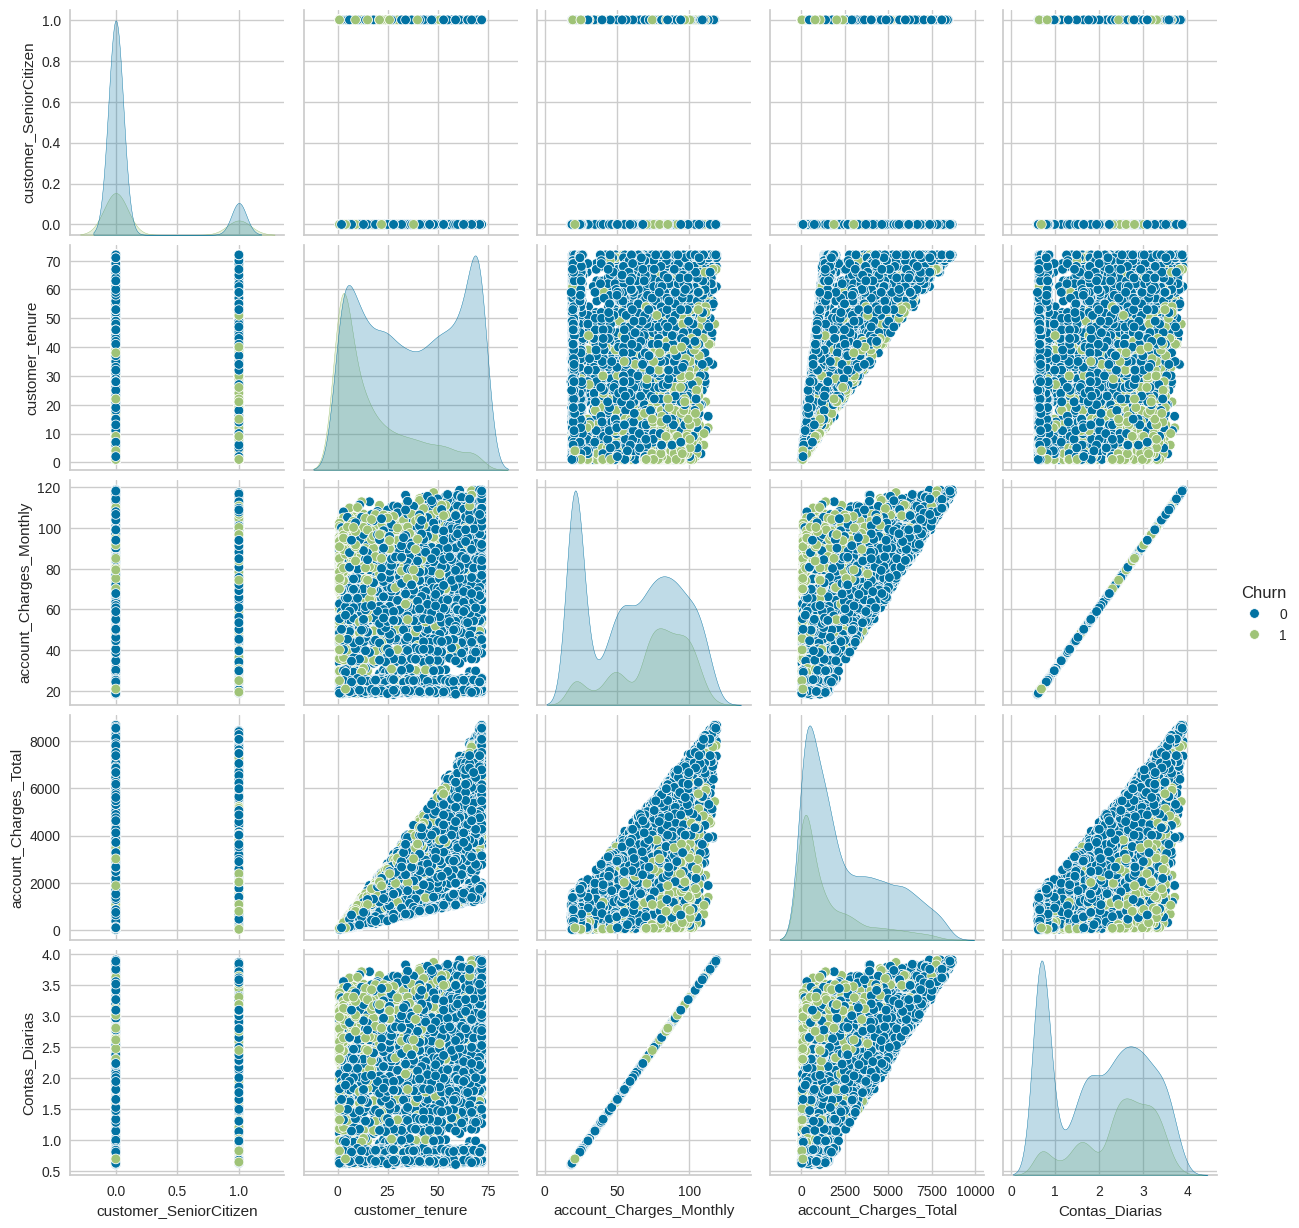

In [200]:
sns.pairplot(dados, hue='Churn')

In [201]:
dados = dados.drop('Contas_Diarias', axis = 1)
X = dados.drop('Churn', axis=1)
Y = dados['Churn']

In [202]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [203]:
colunas = X.columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_gender            7032 non-null   object 
 1   customer_SeniorCitizen     7032 non-null   int64  
 2   customer_Partner           7032 non-null   object 
 3   customer_Dependents        7032 non-null   object 
 4   customer_tenure            7032 non-null   int64  
 5   phone_PhoneService         7032 non-null   object 
 6   phone_MultipleLines        7032 non-null   object 
 7   internet_InternetService   7032 non-null   object 
 8   internet_OnlineSecurity    7032 non-null   object 
 9   internet_OnlineBackup      7032 non-null   object 
 10  internet_DeviceProtection  7032 non-null   object 
 11  internet_TechSupport       7032 non-null   object 
 12  internet_StreamingTV       7032 non-null   object 
 13  internet_StreamingMovies   7032 non-null   objec

In [204]:
one_hot = make_column_transformer((OneHotEncoder(drop = 'if_binary'),
          ['customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService','phone_MultipleLines','internet_InternetService',
           'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
           'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', ]),
           remainder= 'passthrough',
           sparse_threshold=0)

X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(colunas)
dados_X_transformado = pd.DataFrame(X, columns=one_hot.get_feature_names_out(colunas))
dados_X_transformado

,onehotencoder__customer_gender_male,onehotencoder__customer_Partner_yes,onehotencoder__customer_Dependents_yes,onehotencoder__phone_PhoneService_yes,onehotencoder__phone_MultipleLines_yes,onehotencoder__internet_InternetService_dsl,onehotencoder__internet_InternetService_fiber optic,onehotencoder__internet_InternetService_no,onehotencoder__internet_OnlineSecurity_yes,onehotencoder__internet_OnlineBackup_yes,...,onehotencoder__account_Contract_two year,onehotencoder__account_PaperlessBilling_yes,onehotencoder__account_PaymentMethod_bank transfer (automatic),onehotencoder__account_PaymentMethod_credit card (automatic),onehotencoder__account_PaymentMethod_electronic check,onehotencoder__account_PaymentMethod_mailed check,remainder__customer_SeniorCitizen,remainder__customer_tenure,remainder__account_Charges_Monthly,remainder__account_Charges_Total
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90
7028,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70
7029,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75
7030,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65


In [205]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [206]:
dados_X_transformado

,onehotencoder__customer_gender_male,onehotencoder__customer_Partner_yes,onehotencoder__customer_Dependents_yes,onehotencoder__phone_PhoneService_yes,onehotencoder__phone_MultipleLines_yes,onehotencoder__internet_InternetService_dsl,onehotencoder__internet_InternetService_fiber optic,onehotencoder__internet_InternetService_no,onehotencoder__internet_OnlineSecurity_yes,onehotencoder__internet_OnlineBackup_yes,...,onehotencoder__account_Contract_two year,onehotencoder__account_PaperlessBilling_yes,onehotencoder__account_PaymentMethod_bank transfer (automatic),onehotencoder__account_PaymentMethod_credit card (automatic),onehotencoder__account_PaymentMethod_electronic check,onehotencoder__account_PaymentMethod_mailed check,remainder__customer_SeniorCitizen,remainder__customer_tenure,remainder__account_Charges_Monthly,remainder__account_Charges_Total
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90
7028,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70
7029,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75
7030,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65


In [207]:
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


# Justificando o Uso dos Modelos:

Para ter um melhor ajuste, irei testar 4 modelos, dentre eles: DummyClassifier, Árvore de Decisão, Random Forest, KNN e XGBoost, apesar das características citadas abaixo, a análise será empiríca, ou seja, de acordo com o resultado que melhor atender a demanda:

*DummyClassifiers* - Irei utilizar apenas como baseline, para ter parâmetro de comparação;

*Árvore de Decisão* - De fácil interpretação, lida bem com variáveis categóricas e é rapido para treinar, apesar de ter alto risco de overfitting;

*Random Forest* - Apesar de ser mais lento e perder um pouco em interpretabilidade, ele reduz o overfitting das árvores individuais e entrega uma boa performance sem muito tuning;

*KNN* - Será utilizado apenas como parâmetro de comparação, já que é muito sensível a escala e ao número de dimensões, e o dataset tem muitas variáveis categóricas, tendendo a diminuir sua eficiência (Necessário normalizar os dados, para que não tenha uma variação muito grande no cálculo dos vizinhos pela diferença de magnitude de cada feature);

*XGBoost* - Tem a capacidade de capturar interações complexas, geralmente superando o Random Forest em tabelas estruturadas.

In [208]:
def intervalo_conf(resultados_cv):
    accuracies = resultados_cv['test_score']
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    conf_interval = (mean_accuracy - 1.96 * std_accuracy, mean_accuracy + 1.96 * std_accuracy)
    print(f"Acurácia média: {mean_accuracy:.2f}")
    print(f"Intervalo de confiança (95%): [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]")

In [209]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)


In [210]:
normalizacao = MinMaxScaler()
X_treino_normalizado = normalizacao.fit_transform(X_train)
X_teste_normalizado = normalizacao.transform(X_test)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110

Acurácia média: 0.73
Intervalo de confiança (95%): [0.71, 0.76]


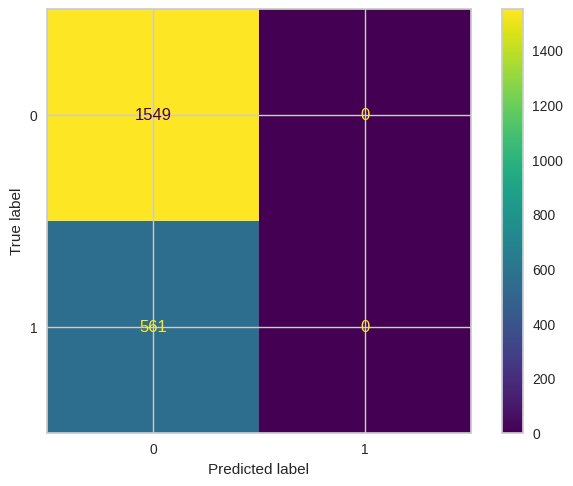

In [211]:
modelo_dummy = DummyClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dummy, X_train, Y_train, cv=kf)

modelo_dummy.fit(X_train, Y_train)
Y_pred_dummy = modelo_dummy.predict(X_test)
print(classification_report(Y_test, Y_pred))

intervalo_conf(cv_resultados)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_dummy)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110

Acurácia média: 0.73
Intervalo de confiança (95%): [0.73, 0.74]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



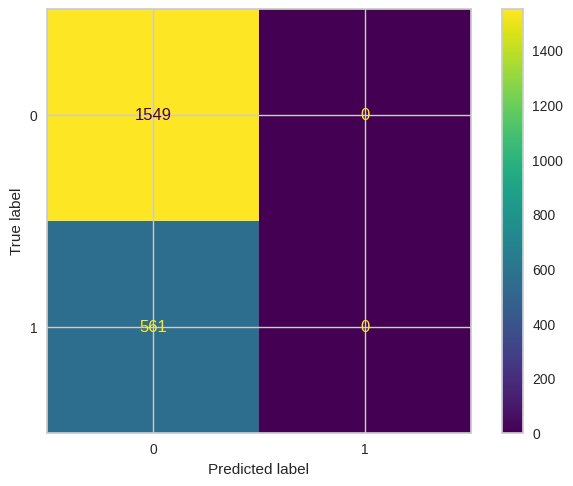

In [212]:
modelo_dummy = DummyClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dummy, X_train, Y_train, cv=skf)

modelo_dummy.fit(X_train, Y_train)
Y_pred_dummy = modelo_dummy.predict(X_test)
print(classification_report(Y_test, Y_pred_dummy))

intervalo_conf(cv_resultados)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_dummy)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.55      0.52      0.53       561

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.69      2110
weighted avg       0.75      0.76      0.76      2110

Acurácia média: 0.76
Intervalo de confiança (95%): [0.72, 0.79]


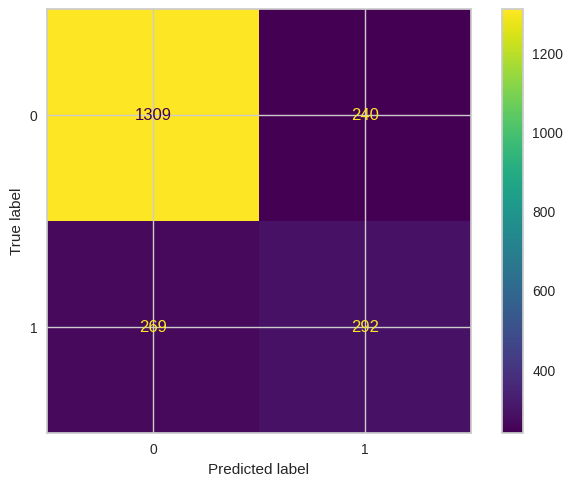

In [213]:
modelo_tree = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_tree, X_train, Y_train, cv=kf)

modelo_tree.fit(X_train, Y_train)
Y_pred_tree = modelo_tree.predict(X_test)
print(classification_report(Y_test, Y_pred_tree))

intervalo_conf(cv_resultados)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_tree)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.56      0.53      0.54       561

    accuracy                           0.76      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110

Acurácia média: 0.76
Intervalo de confiança (95%): [0.73, 0.78]


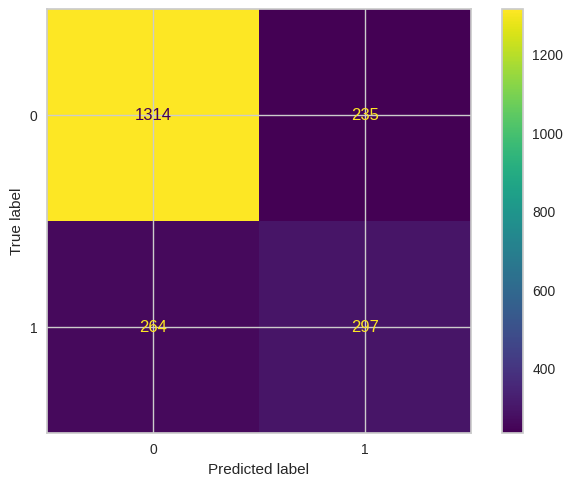

In [214]:
modelo_tree = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_tree, X_train, Y_train, cv=skf)

modelo_tree.fit(X_train, Y_train)
Y_pred_tree = modelo_tree.predict(X_test)
print(classification_report(Y_test, Y_pred_tree))

intervalo_conf(cv_resultados)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_tree)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.52      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110

Acurácia média: 0.80
Intervalo de confiança (95%): [0.78, 0.82]


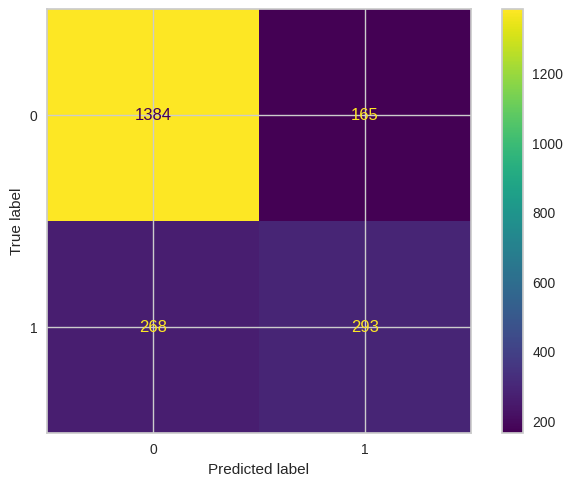

In [215]:
modelo_forest = RandomForestClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_forest, X_train, Y_train, cv=kf)

modelo_forest.fit(X_train, Y_train)
Y_pred_forest = modelo_forest.predict(X_test)
print(classification_report(Y_test, Y_pred_forest))

intervalo_conf(cv_resultados)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_forest)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.52      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110

Acurácia média: 0.80
Intervalo de confiança (95%): [0.79, 0.82]


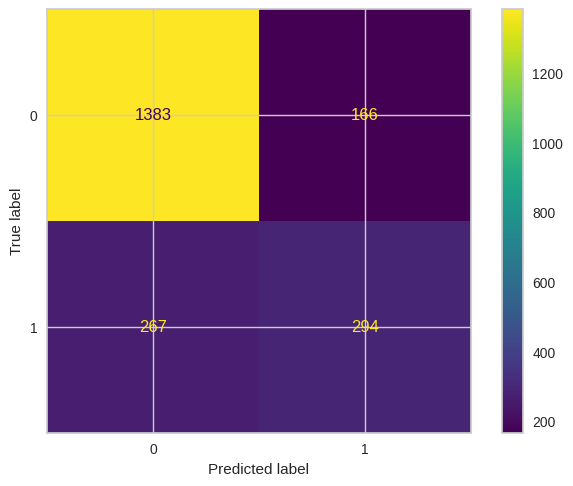

In [216]:
modelo_forest = RandomForestClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_forest, X_train, Y_train, cv=skf)

modelo_forest.fit(X_train, Y_train)
Y_pred_forest = modelo_forest.predict(X_test)
print(classification_report(Y_test, Y_pred_forest))

intervalo_conf(cv_resultados)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_forest)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1549
           1       0.57      0.43      0.49       561

    accuracy                           0.76      2110
   macro avg       0.69      0.66      0.67      2110
weighted avg       0.75      0.76      0.75      2110

Acurácia média: 0.76
Intervalo de confiança (95%): [0.74, 0.78]


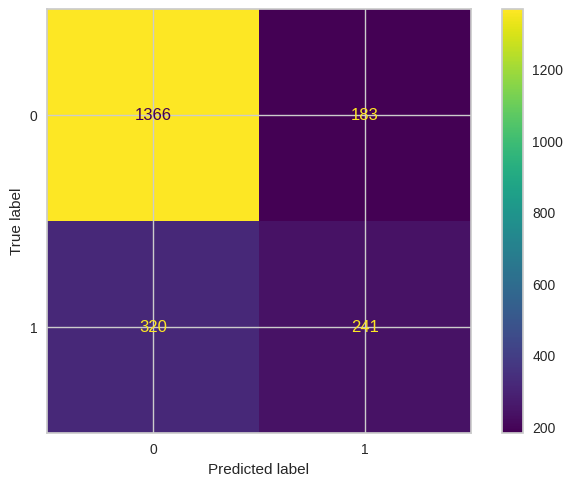

In [217]:
modelo_knn = KNeighborsClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_knn, X_train, Y_train, cv=kf)


modelo_knn.fit(X_train, Y_train)
Y_pred_knn = modelo_knn.predict(X_test)
print(classification_report(Y_test, Y_pred_knn))

intervalo_conf(cv_resultados)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_knn)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1549
           1       0.57      0.43      0.49       561

    accuracy                           0.76      2110
   macro avg       0.69      0.66      0.67      2110
weighted avg       0.75      0.76      0.75      2110

Acurácia média: 0.77
Intervalo de confiança (95%): [0.75, 0.79]


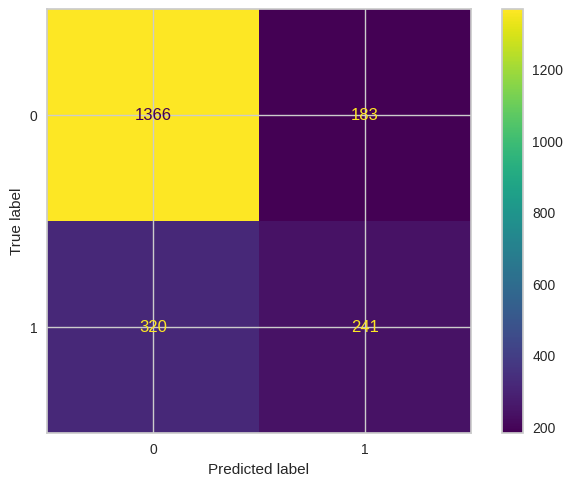

In [218]:
modelo_knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_knn, X_train, Y_train, cv=skf)


modelo_knn.fit(X_train, Y_train)
Y_pred_knn = modelo_knn.predict(X_test)
print(classification_report(Y_test, Y_pred_knn))

intervalo_conf(cv_resultados)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_knn)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[12:16:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[12:16:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[12:16:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[12:16:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[12:16:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[12:16

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1549
           1       0.61      0.52      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110

Acurácia média: 0.79
Intervalo de confiança (95%): [0.77, 0.81]


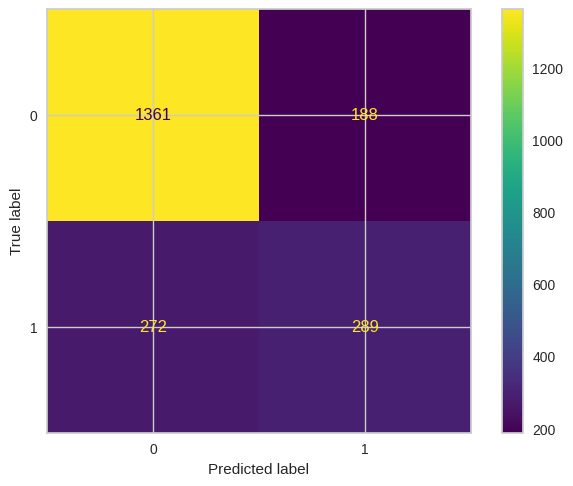

In [219]:
from xgboost import XGBClassifier

modelo_xgb = XGBClassifier(n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_xgb, X_train, Y_train, cv=skf)

modelo_xgb.fit(X_train, Y_train)
Y_pred_xgb = modelo_xgb.predict(X_test)
print(classification_report(Y_test, Y_pred_xgb))

intervalo_conf(cv_resultados)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_xgb)

In [220]:
print(f'Acuracia Dummy: {modelo_dummy.score(X_test, Y_test)}')
print(f'Acuracia Arvore: {modelo_tree.score(X_test, Y_test)}')
print(f'Acuracia Random Forest: {modelo_forest.score(X_test, Y_test)}')
print(f'Acuracia KNN: {modelo_knn.score(X_teste_normalizado, Y_test)}')
print(f'Acuracia XGBoost: {modelo_xgb.score(X_test, Y_test)}')

Acuracia Dummy: 0.7341232227488151
Acuracia Arvore: 0.7635071090047393
Acuracia Random Forest: 0.79478672985782
Acuracia KNN: 0.7341232227488151
Acuracia XGBoost: 0.7819905213270142


# Analise e escolha dos modelos
***
Considerando os resultado das métricas apresentados abaixo:

**Árvore de decisão:**

                precision   recall    f1-score  support
           0       0.83      0.85      0.84      1549
           1       0.54      0.51      0.53       561

    accuracy                           0.76      2110
    Acurácia média: 0.76
    Intervalo de confiança (95%): [0.73, 0.79]

**Random Forest:**

                precision   recall    f1-score  support
           0       0.83      0.89      0.86      1549
           1       0.63      0.51      0.56       561

    accuracy                           0.79      2110
    Acurácia média: 0.80
    Intervalo de confiança (95%): [0.79, 0.81]


**KNN:**

                precision   recall    f1-score  support
           0       0.81      0.88      0.84      1549
           1       0.57      0.43      0.49       561

    accuracy                           0.76      2110
    Acurácia média: 0.77
    Intervalo de confiança (95%): [0.75, 0.79]

**XGBoost:**

                precision   recall    f1-score  support
           0       0.83      0.88      0.86      1549
           1       0.61      0.52      0.56       561

    accuracy                           0.78      2110
    Acurácia média: 0.79
    Intervalo de confiança (95%): [0.77, 0.81]
***
Analisando de forma detalhada cada um dos modelos, suas respectivas métricas e matrizes de confusão, é possível inferir que os modelos que obteram melhor desempenho, com um empate técnico, foram os modelos que utilizaram Random Forest e XGBoost, sendo escolhidos para uma análise mais profunda com modificações de hiperparâmetros, pois como é possível obeservar pelo recall e f1, apresentam underfeating no momento de distinguir entre Churn e não Churn, segue uma pequena interpretação do porque desse resultado semelhante:

As métricas são praticamente idênticas, o que significa que:

- O dataset está bem pré-processado e não tem muito ruído — por isso ambos algoritmos chegam no mesmo teto de desempenho.

- As diferenças entre árvores boosted (XGBoost) e árvores bagged (Random Forest) não estão se destacando aqui.

- O pequeno ganho de acurácia no RF (0.80 vs 0.79) é irrelevante estatisticamente, já que os intervalos de confiança se sobrepõem totalmente.
    

In [221]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

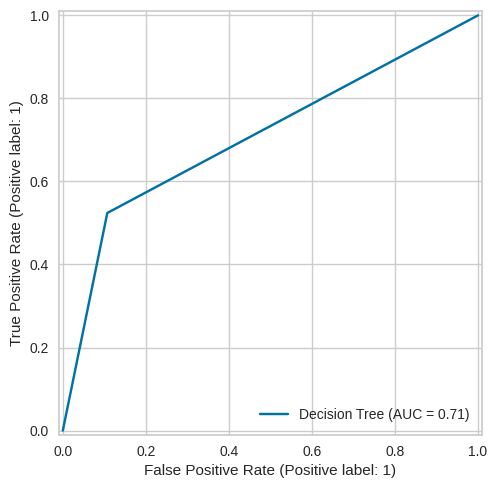

In [222]:
RocCurveDisplay.from_predictions(Y_test, Y_pred_forest, name = 'Decision Tree');

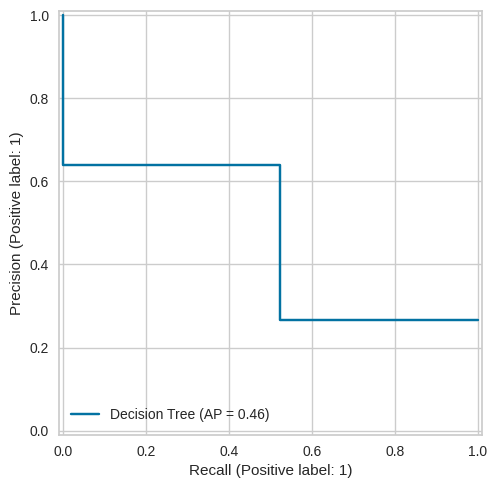

In [223]:
PrecisionRecallDisplay.from_predictions(Y_test, Y_pred_forest, name = 'Decision Tree');

In [224]:
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.model_selection import FeatureImportances

#Random Forest

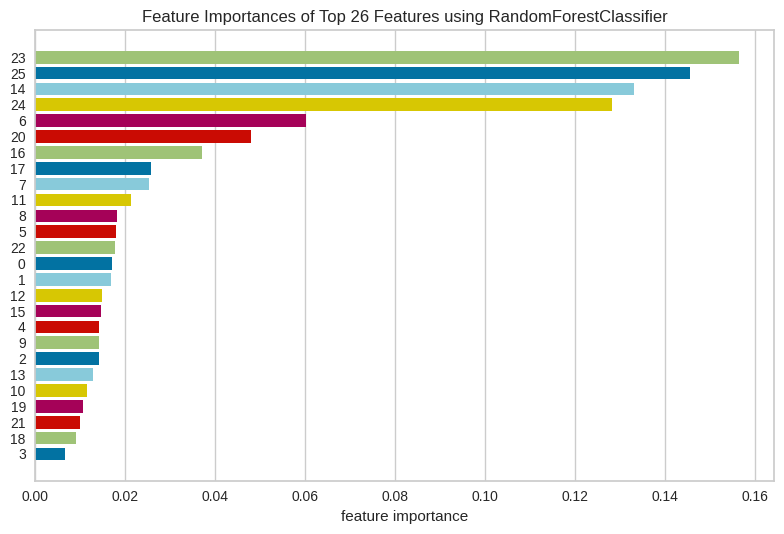

<Axes: title={'center': 'Feature Importances of Top 26 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [225]:
#Otimizando hiperparâmetros

viz = FeatureImportances(modelo_forest, relative=False, topn=26)
viz.fit(X_train, Y_train)
viz.show()

In [226]:
importances = modelo_forest.feature_importances_
feature_importances = pd.DataFrame({'Features': one_hot.get_feature_names_out(colunas), 'Importances': importances}).sort_values(by='Importances')
feature_importances.sort_values(by='Importances', ascending=False)

,Features,Importances
23,remainder__customer_tenure,0.156351
25,remainder__account_Charges_Total,0.145571
14,onehotencoder__account_Contract_month-to-month,0.132988
24,remainder__account_Charges_Monthly,0.128123
6,onehotencoder__internet_InternetService_fiber ...,0.060128
20,onehotencoder__account_PaymentMethod_electroni...,0.048004
16,onehotencoder__account_Contract_two year,0.037040
17,onehotencoder__account_PaperlessBilling_yes,0.025741
7,onehotencoder__internet_InternetService_no,0.025258
11,onehotencoder__internet_TechSupport_yes,0.021303


In [227]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# --- Após o OneHotEncoder ---
X_train = pd.DataFrame(X_train, columns=one_hot.get_feature_names_out(colunas))
X_test = pd.DataFrame(X_test, columns=one_hot.get_feature_names_out(colunas))

# DataFrame para guardar resultados
results_df = pd.DataFrame(index=['precision', 'recall', 'f1-score', 'accuracy'])

model_selected_features = RandomForestClassifier(random_state=42, max_depth=5)

for count in [1, 5, 10, 15, 20, 26]:
    # Seleciona as top-N features
    selected_features = feature_importances['Features'].iloc[:count].tolist()

    # Garante que só use colunas que realmente existem no X_train
    selected_features = [col for col in selected_features if col in X_train.columns]

    # Filtra as colunas no treino e teste
    X_treino_selected = X_train[selected_features]
    X_teste_selected = X_test[selected_features]

    # Treina o modelo
    model_selected_features.fit(X_treino_selected, Y_train)
    y_pred = model_selected_features.predict(X_teste_selected)

    # Calcula métricas
    precision = precision_score(Y_test, y_pred, zero_division=0)
    recall = recall_score(Y_test, y_pred, zero_division=0)
    f1 = f1_score(Y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(Y_test, y_pred)

    # Salva no DataFrame
    results_df[count] = [precision, recall, f1, accuracy]

results_df

,1,5,10,15,20,26
precision,0.000000,0.000000,0.000000,0.628571,0.701220,0.672634
recall,0.000000,0.000000,0.000000,0.039216,0.204991,0.468806
f1-score,0.000000,0.000000,0.000000,0.073826,0.317241,0.552521
accuracy,0.734123,0.734123,0.734123,0.738389,0.765403,0.798104


In [228]:
#Melhorando o modelo e testando com Smote e NearMIss e GridSearch
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbpipeline

In [229]:
#Grid Search

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

model_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='recall',  # ou 'accuracy', 'f1'
    cv=skf
)

model_grid.fit(X_train, Y_train)
print("Melhores parâmetros:", model_grid.best_params_)
print("Melhor score:", model_grid.best_score_)


Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Melhor score: 0.5336492059313855


In [230]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

Acurácia média: 0.63
Intervalo de confiança (95%): [0.59, 0.66]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1549
           1       0.67      0.72      0.70       561

    accuracy                           0.83      2110
   macro avg       0.78      0.80      0.79      2110
weighted avg       0.84      0.83      0.83      2110



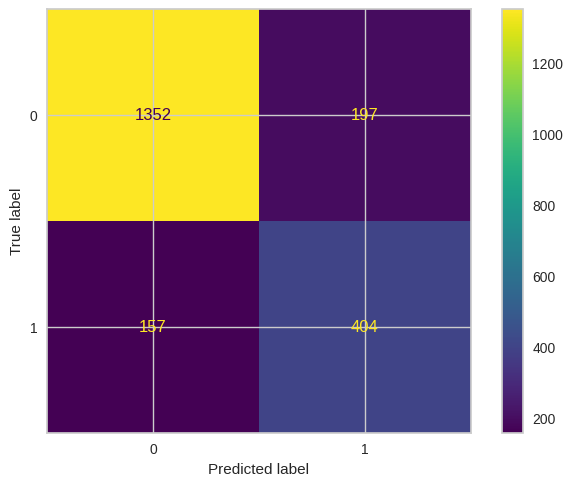

In [231]:
#Smote

modelo_forestOV = RandomForestClassifier(max_depth = 10,
                                         min_samples_leaf = 2,
                                         min_samples_split = 2,
                                         n_estimators = 100)
pipelineOV = imbpipeline([('oversample', SMOTE()), ('arvore',modelo_forestOV)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipelineOV,X,Y, cv=skf, scoring = 'recall')

intervalo_conf(cv_resultados)

pipelineOV.fit(X, Y)
Y_pred_forestOV = pipelineOV.predict(X_test)

print(classification_report(Y_test, Y_pred_forestOV))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_forestOV);

Acurácia média: 0.69
Intervalo de confiança (95%): [0.64, 0.75]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1549
           1       0.64      0.81      0.72       561

    accuracy                           0.83      2110
   macro avg       0.78      0.82      0.80      2110
weighted avg       0.85      0.83      0.84      2110



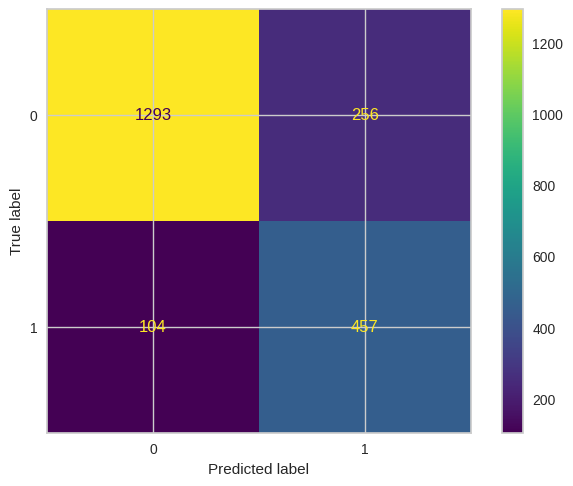

In [232]:
#NearMIss

modelo_forestUN = RandomForestClassifier(max_depth = 10,
                                         min_samples_leaf = 2,
                                         min_samples_split = 2,
                                         n_estimators = 100)
pipelineUN = imbpipeline([('undersample', NearMiss(version=3)), ('arvore',modelo_forestUN)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipelineUN,X,Y, cv=skf, scoring = 'recall')

intervalo_conf(cv_resultados)

pipelineUN.fit(X, Y)
Y_pred_forestUN = pipelineUN.predict(X_test)

print(classification_report(Y_test, Y_pred_forestUN))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_forestUN);

Acurácia média: 0.75
Intervalo de confiança (95%): [0.73, 0.76]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1549
           1       0.56      0.78      0.65       561

    accuracy                           0.78      2110
   macro avg       0.73      0.78      0.75      2110
weighted avg       0.82      0.78      0.79      2110



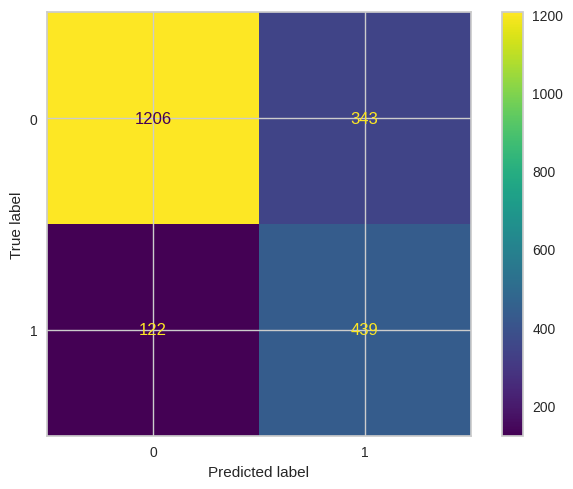

In [233]:
 #SMOTEEN
from imblearn.combine import SMOTEENN

modeloSM = RandomForestClassifier(max_depth = 10,
                                         min_samples_leaf = 2,
                                         min_samples_split = 2,
                                         n_estimators = 100)
pipelineSM = imbpipeline([('smoteenn', SMOTEENN()), ('arvore', modeloSM)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipelineSM, X, Y, cv=skf, scoring = 'recall')

intervalo_conf(cv_resultados)

pipelineSM.fit(X, Y)
Y_pred_forestSM = pipelineSM.predict(X_test)

print(classification_report(Y_test, Y_pred_forestSM))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_forestSM);

Verificando os resultados do NearMIss

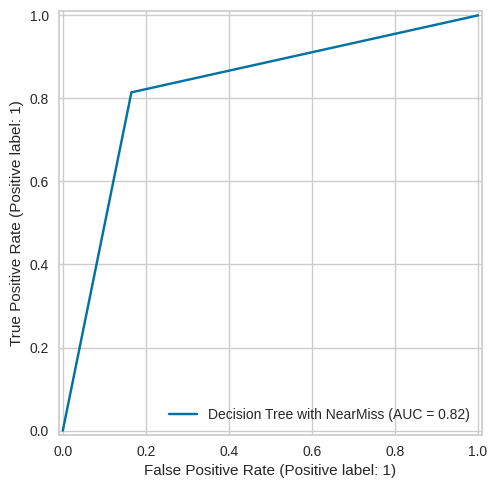

In [234]:
RocCurveDisplay.from_predictions(Y_test, Y_pred_forestUN, name = 'Decision Tree with NearMiss');

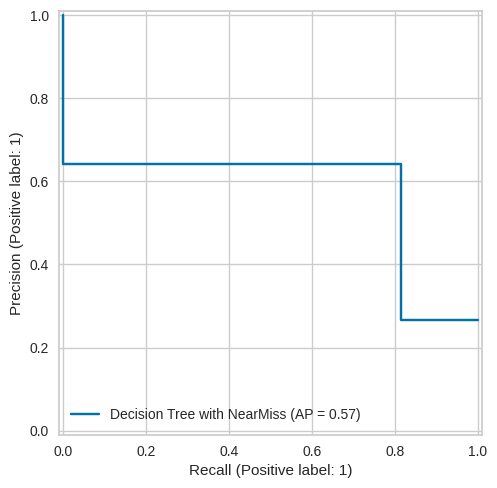

In [235]:
PrecisionRecallDisplay.from_predictions(Y_test, Y_pred_forestUN, name = 'Decision Tree with NearMiss');

In [236]:
#Salvando modelo
import pickle

try:
  with open('model_producao.pkl', 'wb') as file:
    pickle.dump(pipelineUN, file)
  print('Modelo salvo com sucesso')
except Exception as e:
  print(f'Erro ao salvar o modelo: {e}')


Modelo salvo com sucesso


# 📊 Relatório de Análise de Evasão de Clientes – TelecomX

## **1. INtrodução**
O presente estudo teve como objetivo identificar os fatores que mais influenciam a evasão (*churn*) de clientes na **TelecomX** e propor estratégias de retenção baseadas em dados.  

Foram aplicadas técnicas de **análise exploratória**, **pré-processamento de dados**, **seleção de variáveis** e **modelagem preditiva**, comparando diferentes algoritmos.  


---

## **2. Análise Exploratória**
A análise inicial revelou padrões relevantes:

- Clientes que **cancelaram** apresentaram **maior taxa de contratos mensais** e **menor permanência** na base.
- O **tipo de serviço contratado** (especialmente Internet de fibra óptica) teve forte correlação com a evasão.
- A **forma de pagamento** (principalmente boleto eletrônico) foi mais comum entre clientes que saíram.
- Clientes com **suporte técnico mais frequente** tendem a apresentar maior probabilidade de evasão, sugerindo insatisfação prévia.
- Variáveis financeiras, como **valor mensal pago** e **total pago**, mostraram forte influência no churn.

> *Esses insights foram suportados pelos gráficos de barras, histogramas e pairplots presentes no notebook.*

---

## **3. Modelagem e Resultados**
Foram testados diversos modelos de classificação, incluindo:

- **Árvore de Decisão**
- **Random Forest**
- **KNN**
- **XGBoost**

Todos os modelos foram avaliados usando **validação cruzada estratificada**, garantindo robustez nos resultados.

📌 **Melhor modelo:** **PipelineUN**  
- Alta **acurácia** e **recall** para a classe de churn.  
- Melhor equilíbrio entre identificar clientes que irão sair e minimizar falsos positivos.  
- **Matriz de confusão** mostra boa separação entre clientes ativos e evadidos (*já disponível no notebook*).

### **Resultados – Classification Report (PipelineUN)**
    precision    recall  f1-score   support

                precision   recall  f1-score   support  
           0       0.93      0.83      0.88      1549
           1       0.64      0.81      0.72       561

    accuracy                           0.83      2110
    macro avg      0.78      0.82      0.80      2110
    weighted avg   0.85      0.83      0.84      2110


> *Valores extraídos do classification_report gerado no notebook para o melhor modelo.*

---

## **4. Principais Fatores que Influenciam a Evasão**
Com base na análise de **importância de variáveis** e correlações, os principais fatores são:

1. **Tipo de contrato** (Mensal vs. Anual/Bienal)
2. **Valor mensal pago**
3. **Tempo de permanência na base (tenure)**
4. **Tipo de serviço de internet** (Fibra óptica mais propensa ao churn)
5. **Forma de pagamento** (Boleto eletrônico mais propenso à evasão)
6. **Número de chamadas para suporte técnico**

---

## **5. Estratégias de Retenção Propostas**
Com base nos resultados, sugerem-se ações práticas:

- **Planos de fidelização** para clientes com contrato mensal, oferecendo descontos ou benefícios ao migrar para contratos mais longos.
- **Programas de redução de custo** para clientes com alto valor mensal, oferecendo pacotes customizados.
- **Monitoramento proativo** de clientes com alto número de chamados de suporte, solucionando problemas de forma definitiva.
- **Campanhas específicas** para clientes que utilizam boleto eletrônico, incentivando métodos automáticos de pagamento.
- **Acompanhamento personalizado** para novos clientes nos primeiros meses, período crítico de evasão.

---

## **6. Conclusão**
O estudo mostrou que, embora múltiplos fatores contribuam para a evasão, **tipo de contrato**, **valor pago** e **experiência com o suporte técnico** são determinantes-chave.  

O modelo **PipelineUN** provou ser eficiente na previsão de churn e pode ser incorporado ao fluxo de trabalho da TelcomX para **monitorar clientes em risco** e **acionar estratégias preventivas**.  

📊 Com os gráficos de análise exploratória e matrizes de confusão já presentes no notebook, é possível apresentar visualmente as descobertas para áreas de negócio e suporte, facilitando a tomada de decisão.
